In [1]:
import pandas as pd

# Replace 'path_to_diabetes_data' with the actual path to your dataset file
diabetes_data = pd.read_csv('patients.csv')

# Display basic information about the dataset
print(diabetes_data.info())

# Display summary statistics
print(diabetes_data.describe())

# Check for missing values
print(diabetes_data.isnull().sum())

# Check the first few rows of the dataset
print(diabetes_data.head())

# Check unique values in the 'Outcome' column (assuming it's the target variable)
print(diabetes_data['Outcome'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for any missing values
missing_values = diabetes_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Summary statistics
print("\nSummary Statistics:")
print(diabetes_data.describe())

# Data types and non-null counts
print("\nData Types and Non-Null Counts:")
print(diabetes_data.info())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000

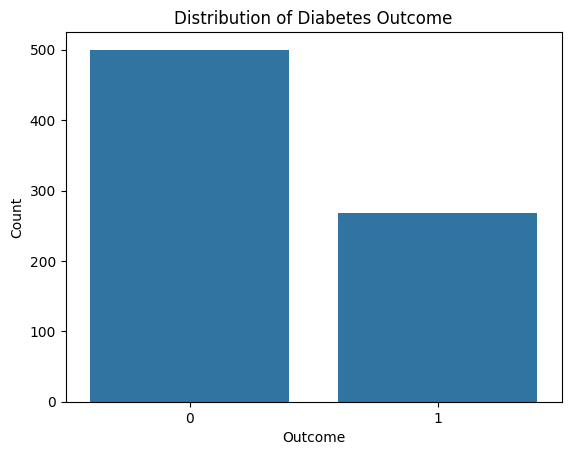

In [5]:
sns.countplot(data=diabetes_data, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

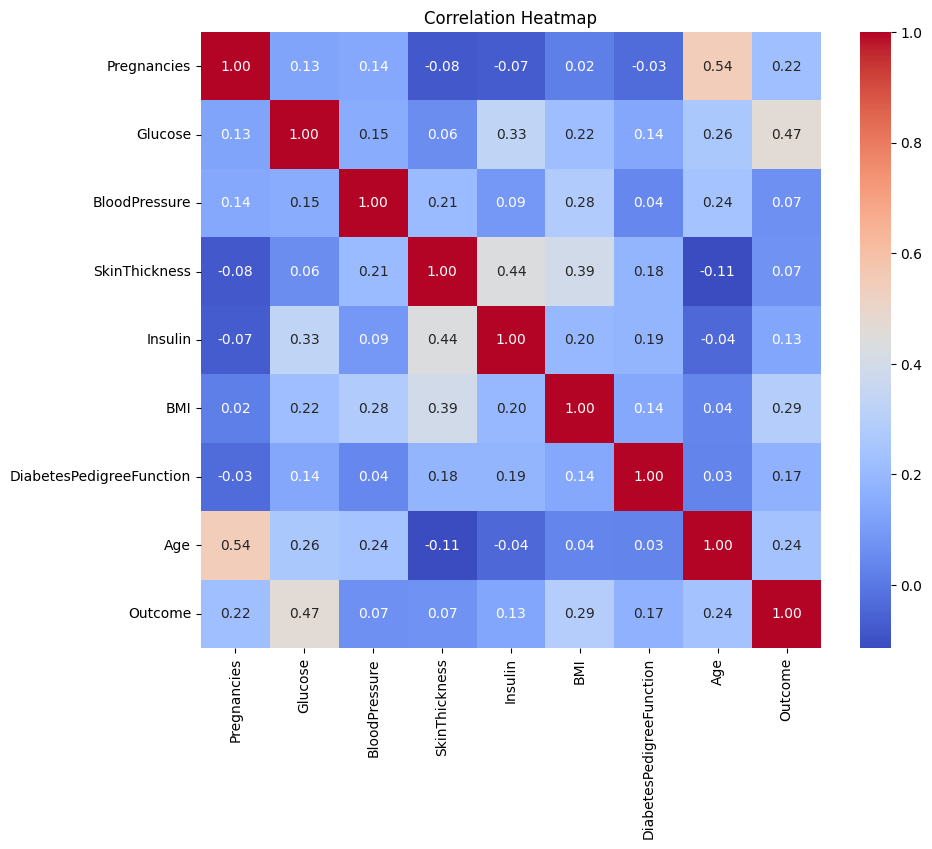

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

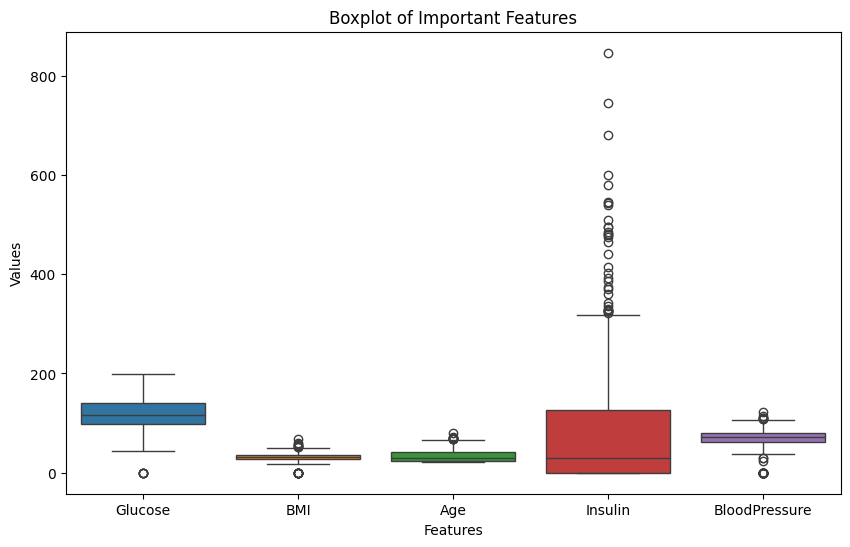

In [7]:
plt.figure(figsize=(10, 6))
important_columns = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']
sns.boxplot(data=diabetes_data[important_columns])
plt.title('Boxplot of Important Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


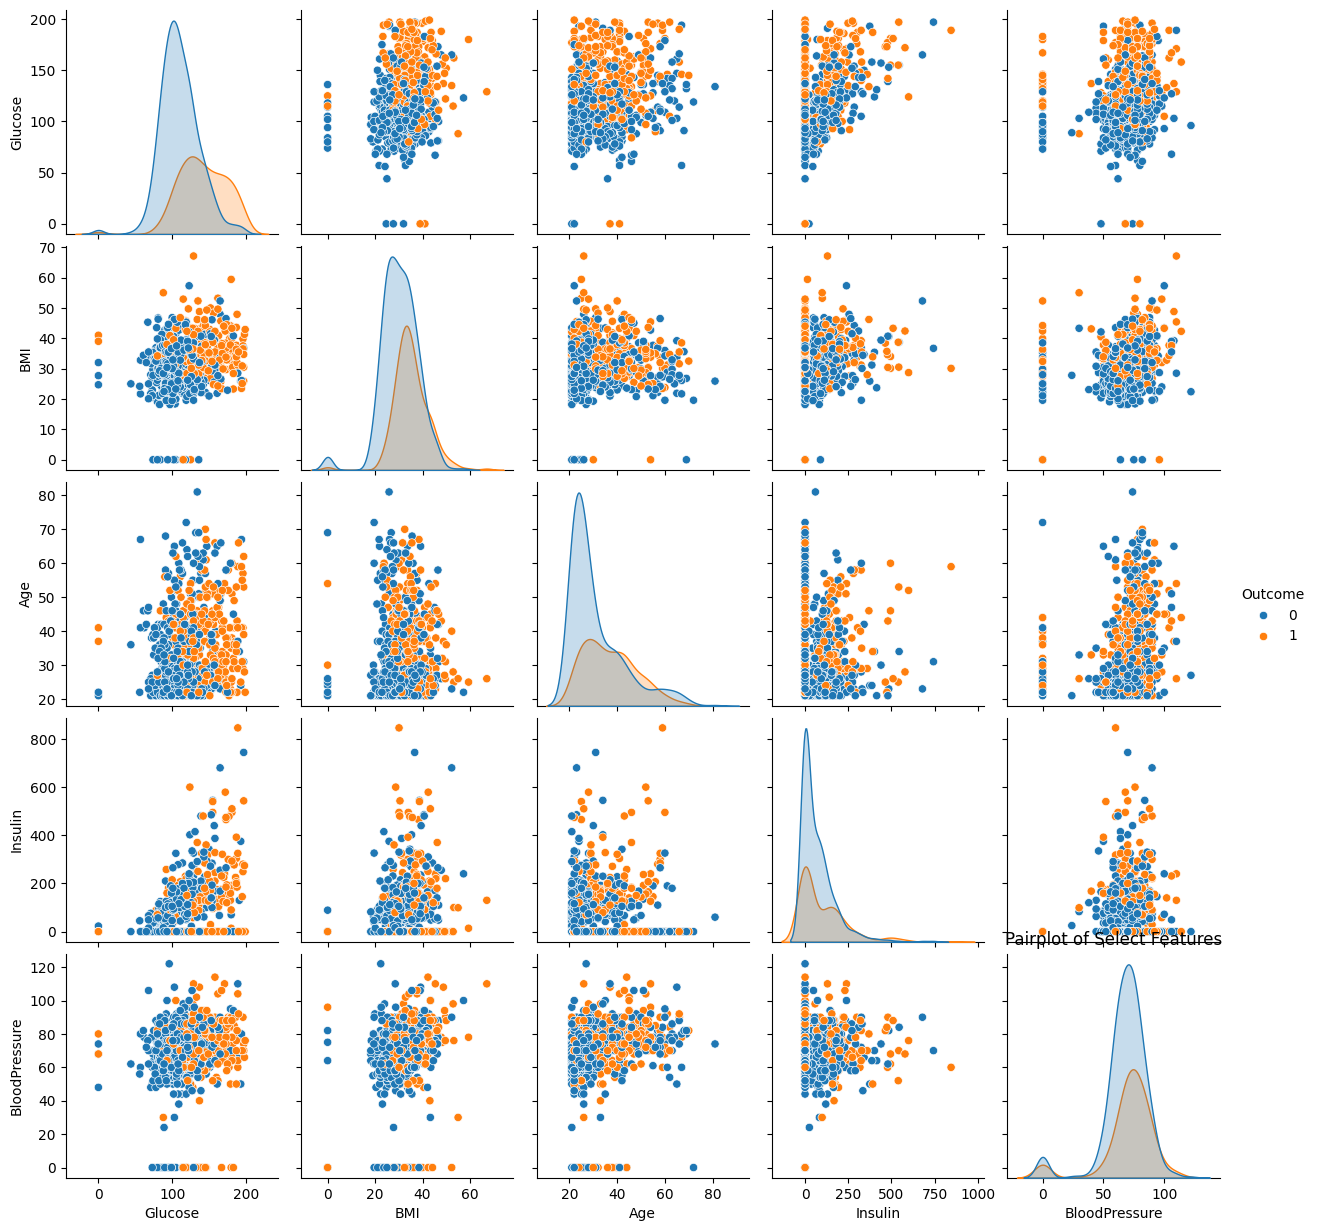

In [8]:
sns.pairplot(diabetes_data[['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Outcome']], hue='Outcome')
plt.title('Pairplot of Select Features')
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Q1 = diabetes_data['BMI'].quantile(0.25)
Q3 = diabetes_data['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply outlier handling
diabetes_data['BMI'] = diabetes_data['BMI'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


print("Changes in 'BMI' column after handling outliers:")
print(diabetes_data[['BMI']].head())


Changes in 'BMI' column after handling outliers:
    BMI
0  33.6
1  26.6
2  23.3
3  28.1
4  43.1


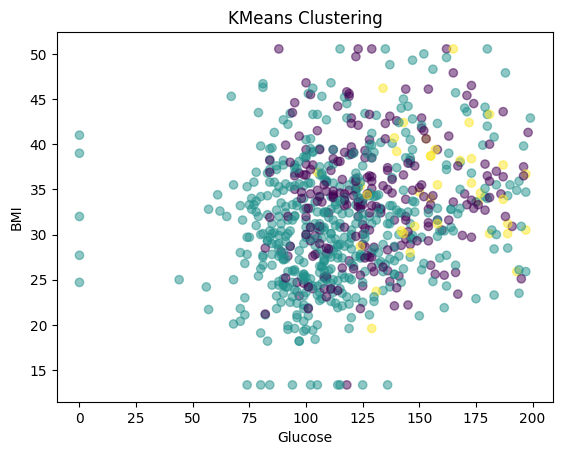

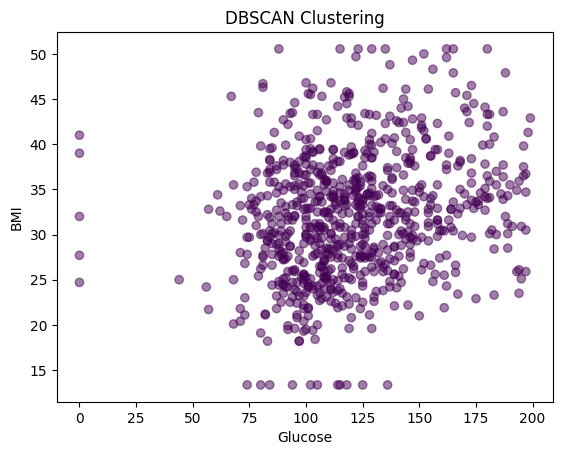

In [16]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Assuming 'diabetes_data' contains your diabetes dataset
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[features]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)
diabetes_data['KMeans_Cluster'] = kmeans.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
diabetes_data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualize the clusters (you can adapt this based on your data dimensions)
plt.scatter(diabetes_data['Glucose'], diabetes_data['BMI'], c=diabetes_data['KMeans_Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('KMeans Clustering')
plt.show()

plt.scatter(diabetes_data['Glucose'], diabetes_data['BMI'], c=diabetes_data['DBSCAN_Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('DBSCAN Clustering')
plt.show()

#KMeans is a clustering algorithm that partitions data into K distinct clusters based on similarity, aiming to minimize the within-cluster variance.

#DBSCAN is a density-based clustering algorithm that identifies clusters as regions of high density separated by regions of low density, suitable for various shapes and sizes of clusters.

In [25]:
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  KMeans_Cluster  DBSCAN_Cluster  \
0                       0.627   

In [26]:
diabetes_data.drop('cluster', axis=1, inplace=True)

In [27]:
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  KMeans_Cluster  DBSCAN_Cluster  
0                       0.627   5

In [30]:
from sklearn.manifold import TSNE

# Assuming df is your DataFrame with features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[features]


tsne = TSNE(n_components=2)
components = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data=components, columns=['TSNE1', 'TSNE2'])
print(df_tsne)

#t-SNE is a technique that compresses high-dimensional data into a lower-dimensional space (like 2D or 3D) to reveal underlying patterns or clusters while preserving local relationships among data points. It's commonly used for visualizing complex datasets in a more interpretable form.

         TSNE1      TSNE2
0   -28.974777 -18.414263
1   -14.048748  -7.964684
2   -39.267731 -18.615328
3    13.439240  16.222593
4    30.870970   4.860355
..         ...        ...
763  36.354679   1.445863
764 -20.958252 -14.532895
765  19.120964   8.568722
766 -33.517815  -6.849732
767 -15.252491  -9.293550

[768 rows x 2 columns]


In [31]:
unique_age_values = diabetes_data['Age'].unique()
print(unique_age_values)

[50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]


In [32]:
unique_pregnancies_values = diabetes_data['Pregnancies'].unique()
print(unique_pregnancies_values)

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


In [35]:
from sklearn.decomposition import FastICA
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[features]
ica = FastICA(n_components=3)
components = ica.fit_transform(X)
df_ica = pd.DataFrame(data=components, columns=['IC1', 'IC2', 'IC3'])
print(df_ica)
#ICA decomposes original features into statistically independent components, aiding in uncovering underlying factors. Splitting into IC1, IC2, IC3 helps preserve these independent components for detailed analysis.

          IC1       IC2       IC3
0    1.188353 -0.655430 -0.323817
1   -0.924440 -0.783001 -0.110637
2    2.299978 -0.391415  0.934779
3   -1.145510  0.048122  0.045934
4    0.114733  0.974372  1.158537
..        ...       ...       ...
763 -0.909966  0.653775 -1.066503
764  0.273112 -0.690813 -0.103243
765 -0.127378  0.254750 -0.125175
766  0.527750 -0.564771  0.697580
767 -0.693549 -0.785182 -0.253008

[768 rows x 3 columns]
